# Sistem Kasir Sederhana

In [ ]:
Projek mini ini membuat sebuah program Sistem Kasir Sederhana yang dapat digunakan untuk mencatat transaksi pembelian barang,
menghitung total belanja, mencetak struk, dan melakukan visualisasi data penjualan.
    
Anggota kelompok :

- Grasia Okta Adelia (124400059)
- Muhammad Azriel Patra (1244000069)
- Najwa Ambia Putri Noer (124400025)

# Import Library

In [9]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 2.4 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/11.0 MB 2.8 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.0 MB 2.7 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.0 MB 2.7 MB/s eta 0:00:04
   -------------- ------------------------- 3.9/11.0 MB 3.2 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/11.0 MB 3.2 MB/s eta 0:00:03
   -------------------- ------------------- 5.5/11.0 MB 3.1 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.0 MB 3.2 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.0 MB 3.4 MB/s eta 0:00:02
   ----------------------------- ---------- 8.1/11.0 MB 3.5 MB/s eta 0:00:01
   ---------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.1 MB/s eta 0:00:08
   ------ --------------------------------- 1.3/8.1 MB 1.8 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 2.1 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.1 MB 1.9 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.1 MB 1.9 MB/s eta 0:00:04
   ----------- ---------------------------- 2.4/8.1 MB 1.7 MB/s eta 0:00:04
   --------------- ------------------------ 3.1/8.1 MB 1.9 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/8.1 MB 2.0 MB/s eta 0:00:03
   --------------------- ------------------ 4.5/8.1 MB 2.1 MB/s eta 0:00:02
   ------------------------- -------------- 5.2/8.1 MB 2.2 MB/s eta 0:00:02
   ---------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
!pip install json

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement json (from versions: none)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for json


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load Data CSV

In [21]:
df = pd.read_csv("barang.csv", sep=",")
df

,"Kode,Nama,Harga"
0,"BRG01,Indomie,3000"
1,"BRG02,Aqua,5000"
2,"BRG03,Teh Botol,4000"
3,"BRG04,Silverqueen,12000"
4,"BRG05,Telur,2500"


# OOP: Class Barang & Kasir

In [16]:
class Barang:
    def __init__(self, kode, nama, harga):
        self.kode = kode
        self.nama = nama
        self.harga = harga

class Kasir:
    def __init__(self, df):
        self.df = df
        self.keranjang = []

    def tambah_barang(self, kode, qty):
        try:
            barang = self.df[self.df["Kode"] == kode].iloc[0]
        except:
            raise Exception("Kode barang tidak ditemukan!")

        subtotal = barang["Harga"] * qty
        self.keranjang.append({
            "kode": kode,
            "nama": barang["Nama"],
            "harga": barang["Harga"],
            "qty": qty,
            "subtotal": subtotal
        })

    def total_belanja(self):
        return sum(item["subtotal"] for item in self.keranjang)

    def simpan_struk_txt(self):
        with open("struk.txt", "w") as f:
            for item in self.keranjang:
                f.write(f"{item['nama']} x{item['qty']} = {item['subtotal']}\n")
            f.write(f"\nTOTAL: {self.total_belanja()}")

    def simpan_log_json(self):
        with open("log_transaksi.json", "w") as f:
            json.dump(self.keranjang, f, indent=4)


# Fungsi & Lambda

In [17]:
# fungsi biasa
def tampilkan_barang(df):
    print(df)

# fungsi lambda menghitung pajak 10%
pajak = lambda total: total * 0.10

# Percabangan & Perulangan Kasir

In [31]:
class Barang:
    def __init__(self, kode, nama, harga):
        self.kode = kode
        self.nama = nama
        self.harga = harga

class Kasir:
    def __init__(self, daftar_barang):
        self.daftar_barang = daftar_barang
        self.keranjang = []  # penyimpanan transaksi

    def cari_barang(self, kode):
        for barang in self.daftar_barang:
            if barang.kode == kode:
                return barang
        return None

# Data barang
daftar_barang = [
    Barang("BRG01", "Indomie", 3000),
    Barang("BRG02", "Aqua", 5000),
    Barang("BRG03", "Teh Botol", 4000),
    Barang("BRG04", "Silverqueen", 12000),
    Barang("BRG05", "Telur", 2500)
]

kasir = Kasir(daftar_barang)

# Input transaksi
kode = input("Masukkan kode barang: ").upper()
barang = kasir.cari_barang(kode)

if barang:
    jumlah = int(input("Jumlah: "))
    subtotal = jumlah * barang.harga

    kasir.keranjang.append({
        "nama": barang.nama,
        "harga": barang.harga,
        "jumlah": jumlah,
        "subtotal": subtotal
    })

    print(f"Nama Barang : {barang.nama}")
    print(f"Harga       : {barang.harga}")
    print(f"Subtotal    : {subtotal}")
else:
    print("Error: Kode barang tidak ditemukan!")


Masukkan kode barang:  BRG05
Jumlah:  4


Nama Barang : Telur
Harga       : 2500
Subtotal    : 10000


# Visualisasi Data Penjualan

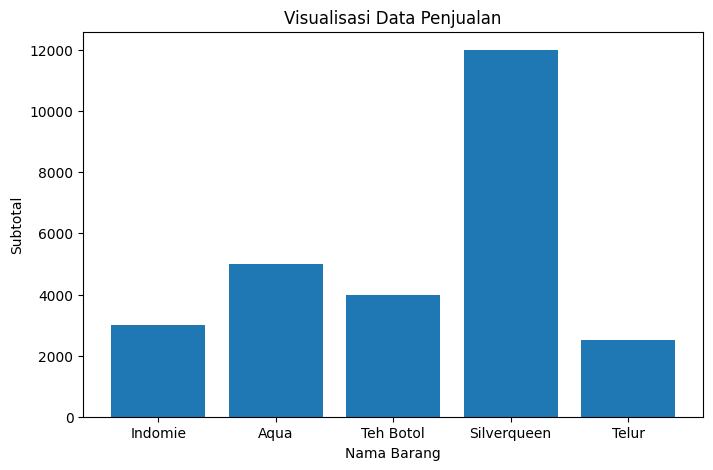

In [34]:
import matplotlib.pyplot as plt

kasir.keranjang = [
    {"nama": "Indomie",       "subtotal": 3000},
    {"nama": "Aqua",          "subtotal": 5000},
    {"nama": "Teh Botol",     "subtotal": 4000},
    {"nama": "Silverqueen",   "subtotal": 12000},
    {"nama": "Telur",         "subtotal": 2500}
]

nama = [item["nama"] for item in kasir.keranjang]
subtotal = [item["subtotal"] for item in kasir.keranjang]

plt.figure(figsize=(8,5))
plt.bar(nama, subtotal)
plt.title("Visualisasi Data Penjualan")
plt.xlabel("Nama Barang")
plt.ylabel("Subtotal")
plt.show()


# KESIMPULAN

Pada projek mini ini, telah dibuat sebuah Sistem Kasir Sederhana dengan fitur:

✔ Membaca data barang dari CSV
✔ Transaksi pembelian dengan looping & percabangan
✔ Perhitungan subtotal, total, dan pajak
✔ Penyimpanan struk ke TXT
✔ Penyimpanan log transaksi ke JSON
✔ Penerapan OOP (class Barang & Kasir)
✔ Exception handling
✔ Visualisasi data pembelian